### The Sparks Foundation Data Science and Business Analytics Internship
### Task 1:Linear regression model for predicting scores of students
#### Author: Gowri S

In this execise we will be using the python code to predict the student score by taking the hours they study per day as input using the machine learning technique called simple linear regression .I will be describing the process in different steps.


In [ ]:
### Step-1: Importing the libraries
Here I have launched the jupiter notebook and have imported some of the necessary libraries for data analysis and visualization. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.datasets import load_iris
iris_cluster=load_iris()
dir(iris_cluster)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [2]:
iris_df=pd.DataFrame(iris_cluster.data,columns=iris_cluster.feature_names)

In [3]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


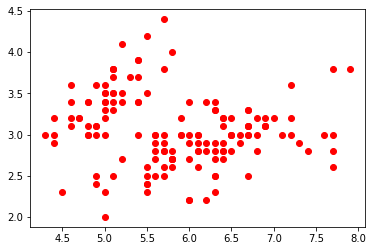

In [4]:
plt.scatter(iris_df[['sepal length (cm)']],iris_df[['sepal width (cm)']],color='r')

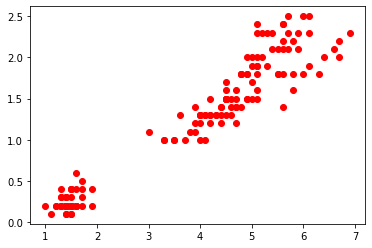

In [5]:
plt.scatter(iris_df[['petal length (cm)']],iris_df[['petal width (cm)']],color='r')

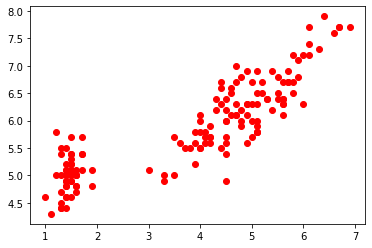

In [6]:
plt.scatter(iris_df[['petal length (cm)']],iris_df[['sepal length (cm)']],color='r')

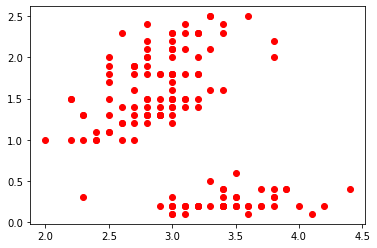

In [7]:
plt.scatter(iris_df[['sepal width (cm)']],iris_df[['petal width (cm)']],color='r')

All these combinations are showing some sort of clustering so we need to look for the optimum number of clusters

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [9]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)

D:\python\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
sse

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.25552380952379,
 46.44618205128204,
 39.03998724608725,
 34.305815295815314,
 30.186555194805198,
 27.976264691448918]

Text(0, 0.5, 'sum of squared error')

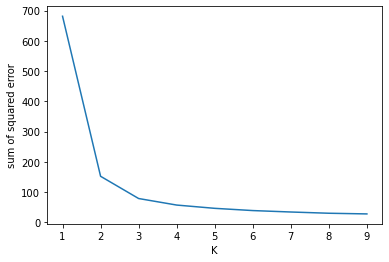

In [11]:
plt.plot(k_rng,sse)
plt.xlabel('K')
plt.ylabel('sum of squared error')

From this we choose optimum cluster number as 3

to see how well it clusters we take any two features

In [12]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [13]:
y_predicted=km.fit_predict(iris_df[['sepal length (cm)','sepal width (cm)']])
y_predicted
iris_df['cluster']=y_predicted
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


No handles with labels found to put in legend.


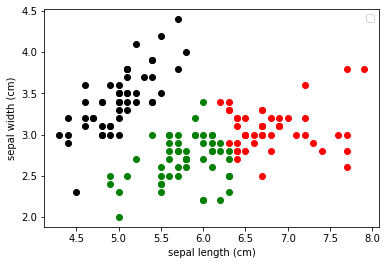

In [14]:
df1=iris_df[iris_df.cluster==0]
df2=iris_df[iris_df.cluster==1]
df3=iris_df[iris_df.cluster==2]
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='r')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='g')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='black')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()

No handles with labels found to put in legend.


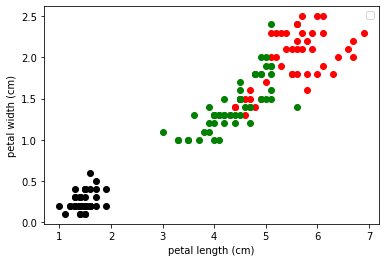

In [15]:
df1=iris_df[iris_df.cluster==0]
df2=iris_df[iris_df.cluster==1]
df3=iris_df[iris_df.cluster==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='r')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='g')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

No handles with labels found to put in legend.


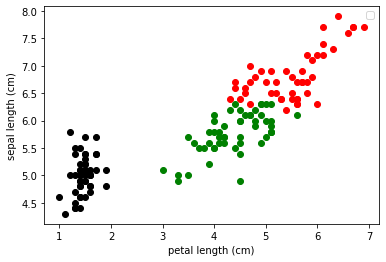

In [16]:
df1=iris_df[iris_df.cluster==0]
df2=iris_df[iris_df.cluster==1]
df3=iris_df[iris_df.cluster==2]
plt.scatter(df1['petal length (cm)'],df1['sepal length (cm)'],color='r')
plt.scatter(df2['petal length (cm)'],df2['sepal length (cm)'],color='g')
plt.scatter(df3['petal length (cm)'],df3['sepal length (cm)'],color='black')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.legend()

No handles with labels found to put in legend.


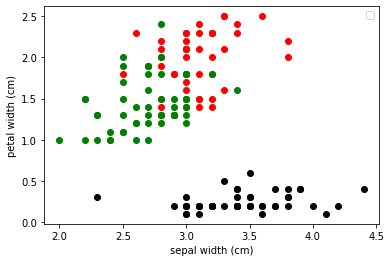

In [17]:
df1=iris_df[iris_df.cluster==0]
df2=iris_df[iris_df.cluster==1]
df3=iris_df[iris_df.cluster==2]
plt.scatter(df1['sepal width (cm)'],df1['petal width (cm)'],color='r')
plt.scatter(df2['sepal width (cm)'],df2['petal width (cm)'],color='g')
plt.scatter(df3['sepal width (cm)'],df3['petal width (cm)'],color='black')
plt.xlabel('sepal width (cm)')
plt.ylabel('petal width (cm)')
plt.legend()